<a href="https://colab.research.google.com/github/TanushGoel/Earthquake-Damage/blob/master/Earthquake_Damage_2_(factorized_differently).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import pandas as pd
pd.options.mode.use_inf_as_na = False
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# dataframe storage reduction
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """w
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
# train data
data = pd.read_csv('model_quake_damage_train.csv')
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [0]:
# swap letters for specific number values in the data

def map_data(df):

  # each unique letter associated with one number increasing from 1 alphabetically
  # eg. a = 1, c=2, d=3, f=4, h=5
  df.land_surface_condition = df.land_surface_condition.map({'t':14, 'o':10, 'n':9})
  df.foundation_type = df.foundation_type.map({'r':12, 'w':17, 'i':6, 'u':15, 'h':5})
  df.roof_type = df.roof_type.map({'n':9, 'q':11, 'x':18})
  df.ground_floor_type = df.ground_floor_type.map({'f':4, 'x':18, 'v':16, 'z':19, 'm':8})
  df.other_floor_type = df.other_floor_type.map({'q':11, 'x':18, 'j':7, 's':13})
  df.position = df.position.map({'t':14, 's':13, 'j':7, 'o':10})
  df.plan_configuration = df.plan_configuration.map({'d':3, 'u':15, 's':13, 'q':11, 'm':8, 'c':2, 'a':1, 'n':9, 'f':4, 'o':10})
  df.legal_ownership_status = df.legal_ownership_status.map({'v':16, 'a':1, 'r':12, 'w':17})
  
  return df

In [0]:
data = map_data(data)
#data.drop('building_id', axis=1, inplace=True)

In [0]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,14,12,9,4,11,14,3,1,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,10,12,9,18,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,14,12,9,4,18,14,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,14,12,9,4,18,13,3,0,1,0,0,0,0,1,1,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,14,12,9,4,18,13,3,1,0,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3


In [0]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [0]:
# test data
data_test = pd.read_csv('model_quake_damage_test.csv')
data_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_test = map_data(data_test)
building_ids = data_test.building_id
#data_test.drop('building_id', axis=1, inplace=True)

In [0]:
data_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,14,12,18,16,7,14,3,0,0,0,0,0,1,0,0,0,0,0,16,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,14,12,11,4,11,14,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, '# of Buildings for each Damage Grade')

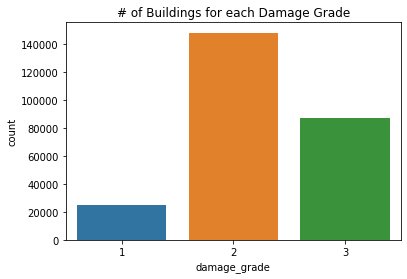

In [0]:
sns.countplot(data['damage_grade'])
plt.title('# of Buildings for each Damage Grade')

Text(0.5, 1, 'Variable Correlations')

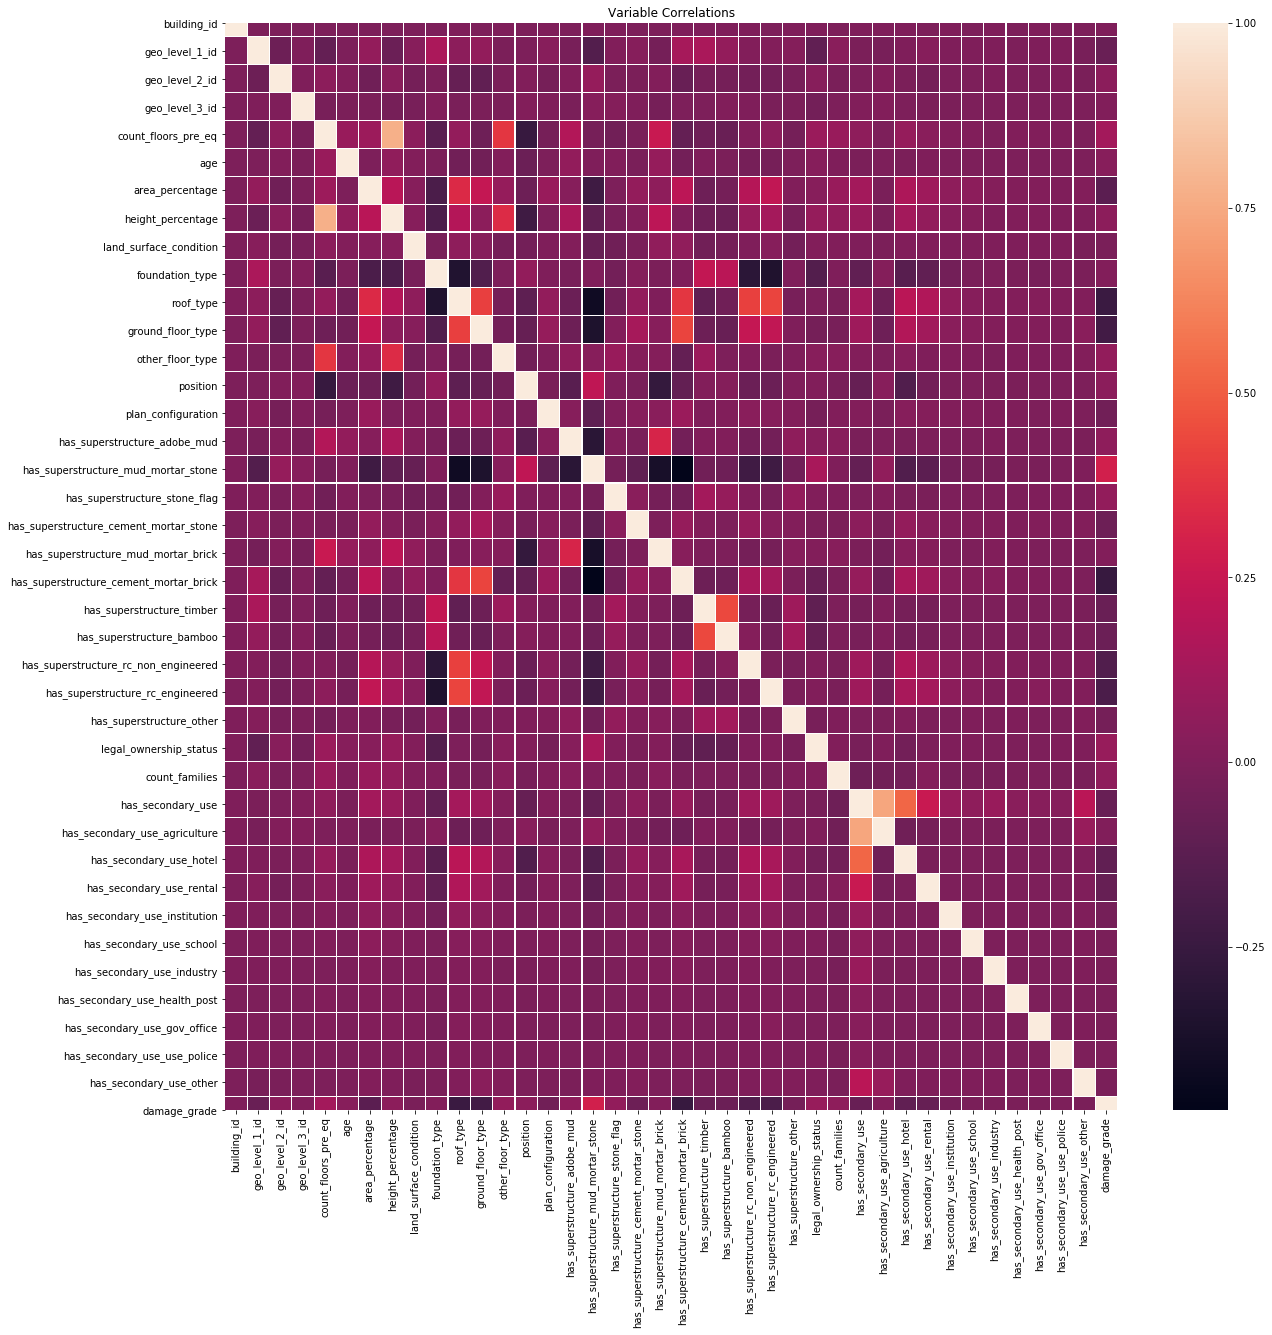

In [0]:
# feature correlation heatmap

import seaborn as sns
correlations = data.corr()
fig, ax = plt.subplots(figsize=(20,20))
corr_heat = sns.heatmap(correlations, linewidths=0.125, ax=ax)
plt.title('Variable Correlations')

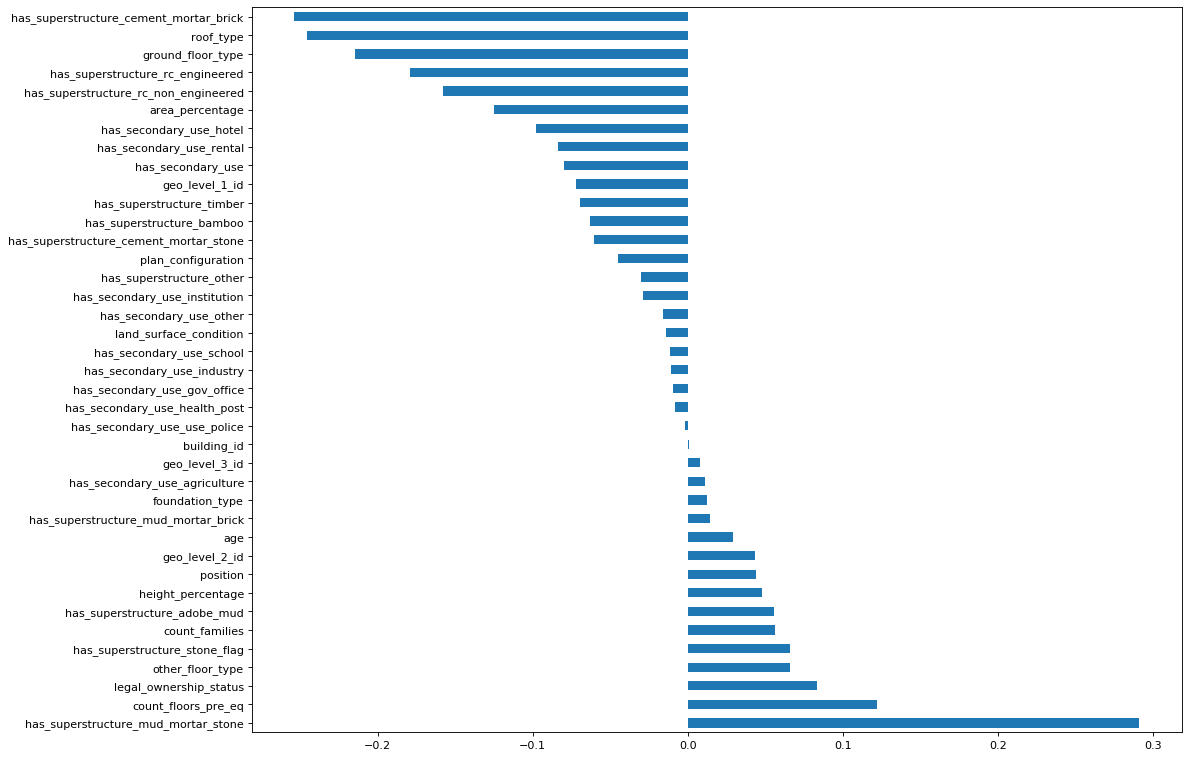

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,12), dpi=80, facecolor='w', edgecolor='k')
correlations.damage_grade.drop('damage_grade').sort_values(ascending=False).plot.barh()

In [0]:
features = data.drop('damage_grade', axis=1)

In [0]:
list_features = list(features.columns)
feature_length = len(list_features)

In [0]:
# determine the best features to use for the model

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = features # independent columns
y = data.damage_grade # target column

# apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=feature_length)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Feature', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(feature_length, 'Score'))  # print best features

del features, list_features, featureScores, dfcolumns, dfscores, X, y

                                   Feature          Score
0                              building_id  474738.212863
2                           geo_level_2_id  128238.967548
5                                      age   89437.601578
3                           geo_level_3_id   83664.759136
11                       ground_floor_type   64361.382843
1                           geo_level_1_id   24186.950757
20  has_superstructure_cement_mortar_brick   18949.414382
24        has_superstructure_rc_engineered   14411.297027
6                          area_percentage   11938.314627
10                               roof_type   11873.966190
23    has_superstructure_rc_non_engineered    8725.518483
16     has_superstructure_mud_mortar_stone    6969.601844
30                 has_secondary_use_hotel    2937.304376
31                has_secondary_use_rental    2635.341540
28                       has_secondary_use    1485.663306
15            has_superstructure_adobe_mud    1340.145544
12            

In [0]:
# add new features 

def add_features(df):
  
  #df["width_percentage"] = df.area_percentage - df.height_percentage + 30
  df["type"] = df.foundation_type * df.roof_type * df.ground_floor_type * df.other_floor_type
  #df["floor_type"] = df.ground_floor_type * df.other_floor_type
  #df["age_floors"] = df.age * df.count_floors_pre_eq
  #df["plan_config_age"] = df.plan_configuration * df.age
  #df["plan_config_floors"] = df.plan_configuration * df.count_floors_pre_eq
  #df["position_legal_ownership"] = df.position * df.legal_ownership_status
  #df["position_fam"] = df.position * df.count_families
  #df["floors_fam"] = df.count_floors_pre_eq - df.count_families + 8
  
  #df["superstructure_mud"] = df.has_superstructure_adobe_mud + df.has_superstructure_mud_mortar_stone + df.has_superstructure_mud_mortar_brick
  #df["superstructure_stone"] = df.has_superstructure_mud_mortar_stone + df.has_superstructure_stone_flag + df.has_superstructure_cement_mortar_stone
  #df["superstructure_mortar"] = df.has_superstructure_mud_mortar_stone + df.has_superstructure_cement_mortar_stone + df.has_superstructure_mud_mortar_brick + df.has_superstructure_cement_mortar_brick
  #df["superstructure_cement"] = df.has_superstructure_cement_mortar_stone + df.has_superstructure_cement_mortar_brick
  #df["superstructure_brick"] = df.has_superstructure_mud_mortar_brick	+ df.has_superstructure_cement_mortar_brick
  
  df["num_superstructures"] = df.has_superstructure_cement_mortar_brick + df.has_superstructure_rc_engineered + df.has_superstructure_rc_non_engineered + df.has_superstructure_mud_mortar_stone + df.has_superstructure_adobe_mud + df.has_superstructure_stone_flag + df.has_superstructure_mud_mortar_brick + df.has_superstructure_bamboo + df.has_superstructure_timber + df.has_superstructure_cement_mortar_stone + df.has_superstructure_other
        
  df["num_secondaries"] = df.has_secondary_use * (df.has_secondary_use_hotel + df.has_secondary_use_rental + df.has_secondary_use_agriculture + df.has_secondary_use_institution + df.has_secondary_use_other + df.has_secondary_use_school + df.has_secondary_use_industry + df.has_secondary_use_gov_office + df.has_secondary_use_health_post + df.has_secondary_use_use_police)
  
  return df

In [0]:
data = add_features(data)
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,type,num_superstructures,num_secondaries
0,6,487,12198,2,30,6,5,14,12,9,4,11,14,3,1,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3,4752,2,0
1,8,900,2812,2,10,8,7,10,12,9,18,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,2,21384,1,0
2,21,363,8973,2,10,5,5,14,12,9,4,18,14,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0
3,22,418,10694,2,10,6,5,14,12,9,4,18,13,3,0,1,0,0,0,0,1,1,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,2,7776,3,0
4,11,131,1488,3,30,8,9,14,12,9,4,18,13,3,1,0,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0


In [0]:
data.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [0]:
data_test = add_features(data_test)
data_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,type,num_superstructures,num_secondaries
0,17,596,11307,3,20,7,6,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0
1,6,141,11987,2,25,13,5,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,1,1,0,0,0,0,0,0,0,0,0,4752,1,1
2,22,19,10044,2,5,4,5,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0
3,26,39,633,1,0,19,3,14,12,18,16,7,14,3,0,0,0,0,0,1,0,0,0,0,0,16,2,1,0,0,1,0,0,0,0,0,0,0,24192,1,1
4,17,289,7970,3,15,8,7,14,12,11,4,11,14,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,5808,1,0


In [0]:
data_test.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [0]:
superstructures = []
  
for i in range(0, data.shape[0]):
  superstruct = ""
  if data.has_superstructure_cement_mortar_brick[i] == 1:
    superstruct += "1"
  if data.has_superstructure_rc_engineered[i] == 1:
    superstruct += "2"
  if data.has_superstructure_rc_non_engineered[i] == 1:
    superstruct += "3"
  if data.has_superstructure_mud_mortar_stone[i] == 1:
    superstruct += "4"
  if data.has_superstructure_adobe_mud[i] == 1:
    superstruct += "5"
  if data.has_superstructure_stone_flag[i] == 1:
    superstruct += "6"
  if data.has_superstructure_mud_mortar_brick[i] == 1:
    superstruct += "7"
  if data.has_superstructure_bamboo[i] == 1:
    superstruct += "8"
  if data.has_superstructure_timber[i] == 1:
    superstruct += "9"
  if data.has_superstructure_cement_mortar_stone[i] == 1:
    superstruct += "0"
  if data.has_superstructure_other[i] == 1:
    superstruct += "00"

  superstructures.append(int(superstruct))

data["superstructures"] = superstructures

In [0]:
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,type,num_superstructures,num_secondaries,superstructures
0,6,487,12198,2,30,6,5,14,12,9,4,11,14,3,1,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3,4752,2,0,45
1,8,900,2812,2,10,8,7,10,12,9,18,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,2,21384,1,0,4
2,21,363,8973,2,10,5,5,14,12,9,4,18,14,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0,4
3,22,418,10694,2,10,6,5,14,12,9,4,18,13,3,0,1,0,0,0,0,1,1,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,2,7776,3,0,489
4,11,131,1488,3,30,8,9,14,12,9,4,18,13,3,1,0,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0,5


In [0]:
data.drop(['has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_cement_mortar_brick', 
           'has_superstructure_mud_mortar_brick', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',  
           'has_superstructure_bamboo', 'has_superstructure_timber', 'has_superstructure_stone_flag',
           'has_superstructure_cement_mortar_stone', 'has_superstructure_other'], inplace=True, axis=1)
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,type,num_superstructures,num_secondaries,superstructures
0,6,487,12198,2,30,6,5,14,12,9,4,11,14,3,16,1,0,0,0,0,0,0,0,0,0,0,0,3,4752,2,0,45
1,8,900,2812,2,10,8,7,10,12,9,18,11,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,2,21384,1,0,4
2,21,363,8973,2,10,5,5,14,12,9,4,18,14,3,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0,4
3,22,418,10694,2,10,6,5,14,12,9,4,18,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,2,7776,3,0,489
4,11,131,1488,3,30,8,9,14,12,9,4,18,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0,5


In [0]:
data.isnull().sum()

geo_level_1_id                   0
geo_level_2_id                   0
geo_level_3_id                   0
count_floors_pre_eq              0
age                              0
area_percentage                  0
height_percentage                0
land_surface_condition           0
foundation_type                  0
roof_type                        0
ground_floor_type                0
other_floor_type                 0
position                         0
plan_configuration               0
legal_ownership_status           0
count_families                   0
has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
damage_grade                     0
type                

In [0]:
superstructures = []
  
for i in range(0, data_test.shape[0]):
  superstruct = ""
  if data_test.has_superstructure_cement_mortar_brick[i] == 1:
    superstruct += "1"
  if data_test.has_superstructure_rc_engineered[i] == 1:
    superstruct += "2"
  if data_test.has_superstructure_rc_non_engineered[i] == 1:
    superstruct += "3"
  if data_test.has_superstructure_mud_mortar_stone[i] == 1:
    superstruct += "4"
  if data_test.has_superstructure_adobe_mud[i] == 1:
    superstruct += "5"
  if data_test.has_superstructure_stone_flag[i] == 1:
    superstruct += "6"
  if data_test.has_superstructure_mud_mortar_brick[i] == 1:
    superstruct += "7"
  if data_test.has_superstructure_bamboo[i] == 1:
    superstruct += "8"
  if data_test.has_superstructure_timber[i] == 1:
    superstruct += "9"
  if data_test.has_superstructure_cement_mortar_stone[i] == 1:
    superstruct += "0"
  if data_test.has_superstructure_other[i] == 1:
    superstruct += "00"

  superstructures.append(int(superstruct))

data_test["superstructures"] = superstructures
del superstructures

In [0]:
data_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,type,num_superstructures,num_secondaries,superstructures
0,17,596,11307,3,20,7,6,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0,4
1,6,141,11987,2,25,13,5,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,1,1,0,0,0,0,0,0,0,0,0,4752,1,1,4
2,22,19,10044,2,5,4,5,14,12,9,4,11,13,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0,4
3,26,39,633,1,0,19,3,14,12,18,16,7,14,3,0,0,0,0,0,1,0,0,0,0,0,16,2,1,0,0,1,0,0,0,0,0,0,0,24192,1,1,1
4,17,289,7970,3,15,8,7,14,12,11,4,11,14,3,0,1,0,0,0,0,0,0,0,0,0,16,1,0,0,0,0,0,0,0,0,0,0,0,5808,1,0,4


In [0]:
data_test.drop(['has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_cement_mortar_brick', 
           'has_superstructure_mud_mortar_brick', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',  
           'has_superstructure_bamboo', 'has_superstructure_timber', 'has_superstructure_stone_flag',
           'has_superstructure_cement_mortar_stone', 'has_superstructure_other'], inplace=True, axis=1)
data_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,type,num_superstructures,num_secondaries,superstructures
0,17,596,11307,3,20,7,6,14,12,9,4,11,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0,4
1,6,141,11987,2,25,13,5,14,12,9,4,11,13,3,16,1,1,1,0,0,0,0,0,0,0,0,0,4752,1,1,4
2,22,19,10044,2,5,4,5,14,12,9,4,11,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0,4
3,26,39,633,1,0,19,3,14,12,18,16,7,14,3,16,2,1,0,0,1,0,0,0,0,0,0,0,24192,1,1,1
4,17,289,7970,3,15,8,7,14,12,11,4,11,14,3,16,1,0,0,0,0,0,0,0,0,0,0,0,5808,1,0,4


In [0]:
data_test.isnull().sum()

geo_level_1_id                   0
geo_level_2_id                   0
geo_level_3_id                   0
count_floors_pre_eq              0
age                              0
area_percentage                  0
height_percentage                0
land_surface_condition           0
foundation_type                  0
roof_type                        0
ground_floor_type                0
other_floor_type                 0
position                         0
plan_configuration               0
legal_ownership_status           0
count_families                   0
has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
type                             0
num_superstructures 

In [0]:
secondaries = []
  
for i in range(0, data.shape[0]):
  secondary = ""
  if data.has_secondary_use[i] == 1:
    if data.has_secondary_use_agriculture[i] == 1:
      secondary += "10"
    if data.has_secondary_use_hotel[i] == 1:
      secondary += "20"
    if data.has_secondary_use_rental[i] == 1:
      secondary += "30"
    if data.has_secondary_use_institution[i] == 1:
      secondary += "40"
    if data.has_secondary_use_school[i] == 1:
      secondary += "50"
    if data.has_secondary_use_industry[i] == 1:
      secondary += "60"
    if data.has_secondary_use_health_post[i] == 1:
      secondary += "70"
    if data.has_secondary_use_gov_office[i] == 1:
      secondary += "80"
    if data.has_secondary_use_use_police[i] == 1:
      secondary += "90"
    if data.has_secondary_use_other[i] == 1:
      secondary += "99"
  else:
    secondary += "0"

  secondaries.append(int(secondary))

data["secondary"] = secondaries

In [0]:
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,type,num_superstructures,num_secondaries,superstructures,secondary
0,6,487,12198,2,30,6,5,14,12,9,4,11,14,3,16,1,0,0,0,0,0,0,0,0,0,0,0,3,4752,2,0,45,0
1,8,900,2812,2,10,8,7,10,12,9,18,11,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,2,21384,1,0,4,0
2,21,363,8973,2,10,5,5,14,12,9,4,18,14,3,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0,4,0
3,22,418,10694,2,10,6,5,14,12,9,4,18,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,2,7776,3,0,489,0
4,11,131,1488,3,30,8,9,14,12,9,4,18,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,3,7776,1,0,5,0


In [0]:
data.drop(['has_secondary_use_rental', 'has_secondary_use_hotel', 'has_secondary_use', 
           'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_rental', 
           'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
           'has_secondary_use_use_police', 'has_secondary_use_other', 'has_secondary_use_agriculture'], inplace=True, axis=1)
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,damage_grade,type,num_superstructures,num_secondaries,superstructures,secondary
0,6,487,12198,2,30,6,5,14,12,9,4,11,14,3,16,1,3,4752,2,0,45,0
1,8,900,2812,2,10,8,7,10,12,9,18,11,13,3,16,1,2,21384,1,0,4,0
2,21,363,8973,2,10,5,5,14,12,9,4,18,14,3,16,1,3,7776,1,0,4,0
3,22,418,10694,2,10,6,5,14,12,9,4,18,13,3,16,1,2,7776,3,0,489,0
4,11,131,1488,3,30,8,9,14,12,9,4,18,13,3,16,1,3,7776,1,0,5,0


In [0]:
data.isnull().sum()

geo_level_1_id            0
geo_level_2_id            0
geo_level_3_id            0
count_floors_pre_eq       0
age                       0
area_percentage           0
height_percentage         0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
legal_ownership_status    0
count_families            0
damage_grade              0
type                      0
num_superstructures       0
num_secondaries           0
superstructures           0
secondary                 0
dtype: int64

In [0]:
secondaries = []
  
for i in range(0, data_test.shape[0]):
  secondary = ""
  if data_test.has_secondary_use[i] == 1:
    if data_test.has_secondary_use_agriculture[i] == 1:
      secondary += "10"
    if data_test.has_secondary_use_hotel[i] == 1:
      secondary += "20"
    if data_test.has_secondary_use_rental[i] == 1:
      secondary += "30"
    if data_test.has_secondary_use_institution[i] == 1:
      secondary += "40"
    if data_test.has_secondary_use_school[i] == 1:
      secondary += "50"
    if data_test.has_secondary_use_industry[i] == 1:
      secondary += "60"
    if data_test.has_secondary_use_health_post[i] == 1:
      secondary += "70"
    if data_test.has_secondary_use_gov_office[i] == 1:
      secondary += "80"
    if data_test.has_secondary_use_use_police[i] == 1:
      secondary += "90"
    if data_test.has_secondary_use_other[i] == 1:
      secondary += "99"
  else:
    secondary += "0"

  secondaries.append(int(secondary))

data_test["secondary"] = secondaries
del secondaries

In [0]:
data_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,type,num_superstructures,num_secondaries,superstructures,secondary
0,17,596,11307,3,20,7,6,14,12,9,4,11,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0,4,0
1,6,141,11987,2,25,13,5,14,12,9,4,11,13,3,16,1,1,1,0,0,0,0,0,0,0,0,0,4752,1,1,4,10
2,22,19,10044,2,5,4,5,14,12,9,4,11,13,3,16,1,0,0,0,0,0,0,0,0,0,0,0,4752,1,0,4,0
3,26,39,633,1,0,19,3,14,12,18,16,7,14,3,16,2,1,0,0,1,0,0,0,0,0,0,0,24192,1,1,1,30
4,17,289,7970,3,15,8,7,14,12,11,4,11,14,3,16,1,0,0,0,0,0,0,0,0,0,0,0,5808,1,0,4,0


In [0]:
data_test.drop(['has_secondary_use_rental', 'has_secondary_use_hotel', 'has_secondary_use', 
           'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_rental', 
           'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
           'has_secondary_use_use_police', 'has_secondary_use_other', 'has_secondary_use_agriculture'], inplace=True, axis=1)
data_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,count_families,type,num_superstructures,num_secondaries,superstructures,secondary
0,17,596,11307,3,20,7,6,14,12,9,4,11,13,3,16,1,4752,1,0,4,0
1,6,141,11987,2,25,13,5,14,12,9,4,11,13,3,16,1,4752,1,1,4,10
2,22,19,10044,2,5,4,5,14,12,9,4,11,13,3,16,1,4752,1,0,4,0
3,26,39,633,1,0,19,3,14,12,18,16,7,14,3,16,2,24192,1,1,1,30
4,17,289,7970,3,15,8,7,14,12,11,4,11,14,3,16,1,5808,1,0,4,0


In [0]:
data_test.isnull().sum()

geo_level_1_id            0
geo_level_2_id            0
geo_level_3_id            0
count_floors_pre_eq       0
age                       0
area_percentage           0
height_percentage         0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
legal_ownership_status    0
count_families            0
type                      0
num_superstructures       0
num_secondaries           0
superstructures           0
secondary                 0
dtype: int64

In [0]:
# feature correlation heatmap

import seaborn as sns
correlations = data.corr()
fig, ax = plt.subplots(figsize=(25,25))
corr_heat = sns.heatmap(correlations, linewidths=0.125, ax=ax)
plt.title('Variable Correlations')

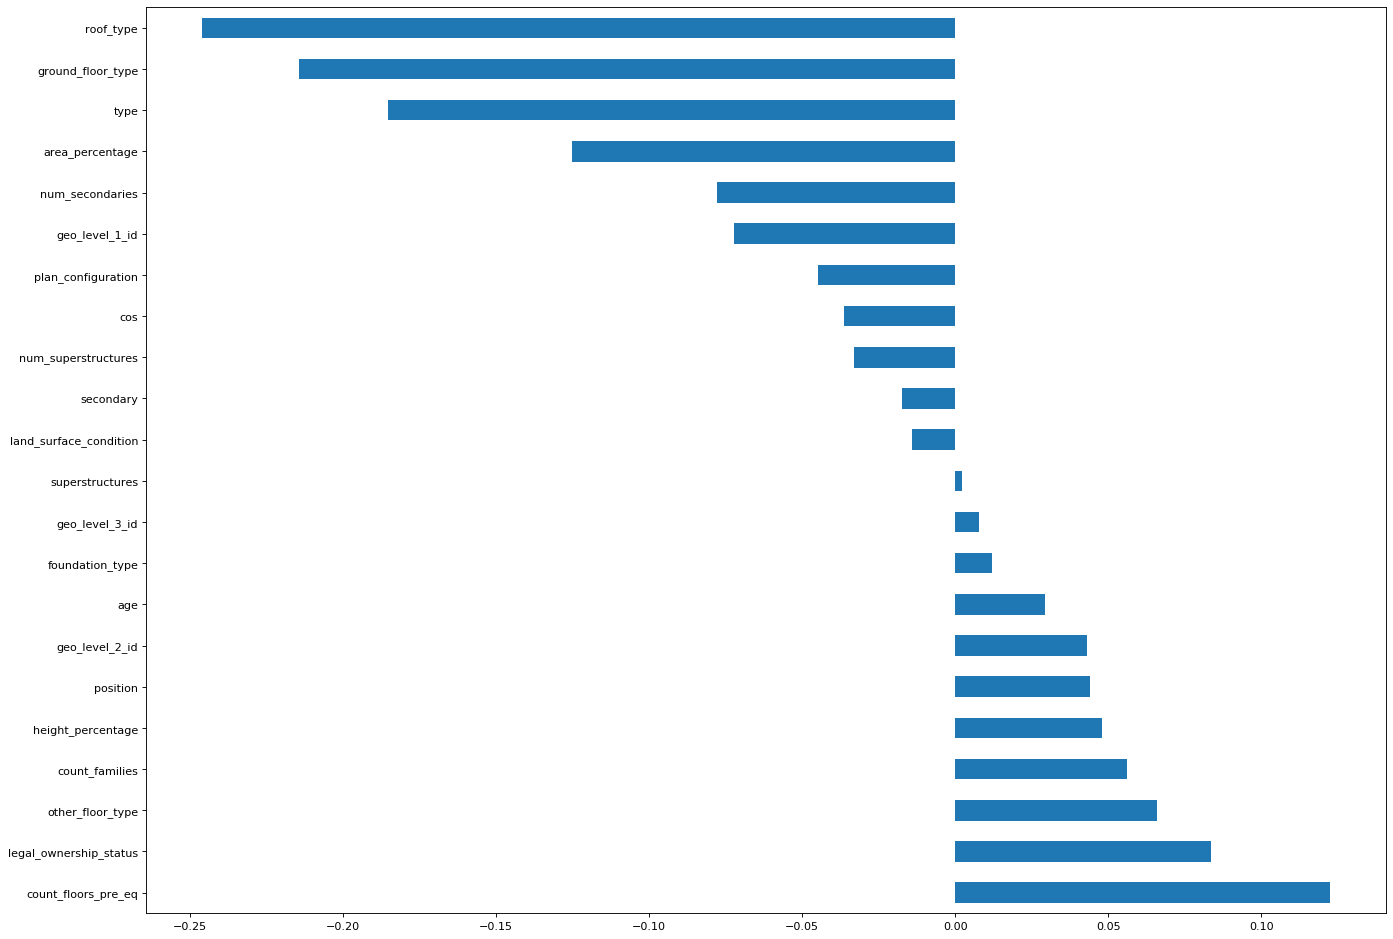

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
correlations.damage_grade.drop('damage_grade').sort_values(ascending=False).plot.barh()

In [0]:
features = data.drop('damage_grade', axis=1)

In [0]:
list_features = list(features.columns)
feature_length = len(list_features)

In [0]:
# determine the best features to use for the model

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = features # independent columns
y = data.damage_grade # target column

# apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=feature_length)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # naming the dataframe columns
print(featureScores.nlargest(feature_length,'Score'))  # print best features

del features, list_features, featureScores, dfcolumns, dfscores, X, y

                   Feature         Score
19         superstructures  2.192340e+08
16                    type  1.069065e+08
1           geo_level_2_id  1.282390e+05
4                      age  8.943760e+04
20               secondary  8.735021e+04
2           geo_level_3_id  8.366476e+04
10       ground_floor_type  6.436138e+04
0           geo_level_1_id  2.418695e+04
5          area_percentage  1.193831e+04
9                roof_type  1.187397e+04
18         num_secondaries  1.477297e+03
11        other_floor_type  1.267777e+03
3      count_floors_pre_eq  1.241172e+03
13      plan_configuration  7.419184e+02
14  legal_ownership_status  7.226304e+02
8          foundation_type  5.132784e+02
6        height_percentage  4.999709e+02
17     num_superstructures  3.863540e+02
15          count_families  1.689492e+02
7   land_surface_condition  1.010410e+02
12                position  8.222079e+01
21                     cos  1.060231e+00


In [0]:
data = reduce_mem_usage(data)

Memory usage of dataframe is 47.72 MB
Memory usage after optimization is: 10.94 MB
Decreased by 77.1%


In [0]:
data_test = reduce_mem_usage(data_test)

Memory usage of dataframe is 15.24 MB
Memory usage after optimization is: 3.56 MB
Decreased by 76.6%


In [0]:
# train valid split

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data.drop('damage_grade', axis=1), data.damage_grade, test_size=0.0025, random_state=42)

In [0]:
print('Train:', X_train.shape[0])
print('Valid:', X_valid.shape[0])

Train: 259949
Valid: 652


In [0]:
!pip3 -q install imblearn

In [0]:
from imblearn.over_sampling import RandomOverSampler

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)

print("X_valid dataset: ", X_valid.shape)
print("y_valid dataset: ", y_valid.shape)

print(f"After OverSampling, counts of label '1': {sum(y_train==1)}")
print(f"After OverSampling, counts of label '2': {sum(y_train==2)}")
print(f"After OverSampling, counts of label '3': {sum(y_train==3)}")

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train, y_train = X_resampled, y_resampled
del X_resampled, y_resampled

print(f'After OverSampling, the shape of train_X: {X_train.shape}')
print(f'After OverSampling, the shape of train_y: {y_train.shape}')

print(f"After OverSampling, counts of label '1': {sum(y_train==1)}")
print(f"After OverSampling, counts of label '2': {sum(y_train==2)}")
print(f"After OverSampling, counts of label '3': {sum(y_train==3)}")

In [0]:
# catboost model

!pip3 -q install catboost
from catboost import Pool, CatBoostClassifier

In [0]:
train_pool = Pool(X_train, y_train)
cat_clf = CatBoostClassifier(loss_function='MultiClass', custom_metric=['AUC','MultiClass'] , boosting_type='Ordered', bootstrap_type='Bayesian', od_type='Iter', iterations=25000, random_state=42, use_best_model=True) #, class_weights = [0.425,0.225,0.35]
cat_clf.fit(train_pool, eval_set=(X_valid, y_valid), early_stopping_rounds=1500, verbose=25)
cat_clf.best_score_

0:	learn: 1.0822062	test: 1.0815762	best: 1.0815762 (0)	total: 129ms	remaining: 53m 49s
25:	learn: 0.8640464	test: 0.8611585	best: 0.8611585 (25)	total: 2.01s	remaining: 32m 14s
50:	learn: 0.7875649	test: 0.7813215	best: 0.7813215 (50)	total: 3.88s	remaining: 31m 40s
75:	learn: 0.7559050	test: 0.7475653	best: 0.7475653 (75)	total: 5.73s	remaining: 31m 17s
100:	learn: 0.7385006	test: 0.7298499	best: 0.7298499 (100)	total: 7.61s	remaining: 31m 15s
125:	learn: 0.7271774	test: 0.7188308	best: 0.7188308 (125)	total: 9.52s	remaining: 31m 19s
150:	learn: 0.7194552	test: 0.7114244	best: 0.7114244 (150)	total: 11.4s	remaining: 31m 11s
175:	learn: 0.7125506	test: 0.7051596	best: 0.7051596 (175)	total: 13.2s	remaining: 31m 6s
200:	learn: 0.7074757	test: 0.6996097	best: 0.6996097 (200)	total: 15.1s	remaining: 31m 3s
225:	learn: 0.7031108	test: 0.6957128	best: 0.6957128 (225)	total: 17s	remaining: 31m 1s
250:	learn: 0.6996132	test: 0.6920000	best: 0.6920000 (250)	total: 18.9s	remaining: 30m 59s
275

{'learn': {'MultiClass': 0.5198149664452527},
 'validation': {'AUC:type=Mu': 0.9081751527438845,
  'MultiClass': 0.5838953397484999}}

In [0]:
cat_clf.save_model('Earthquake_Damage_Catboost.hdf5')

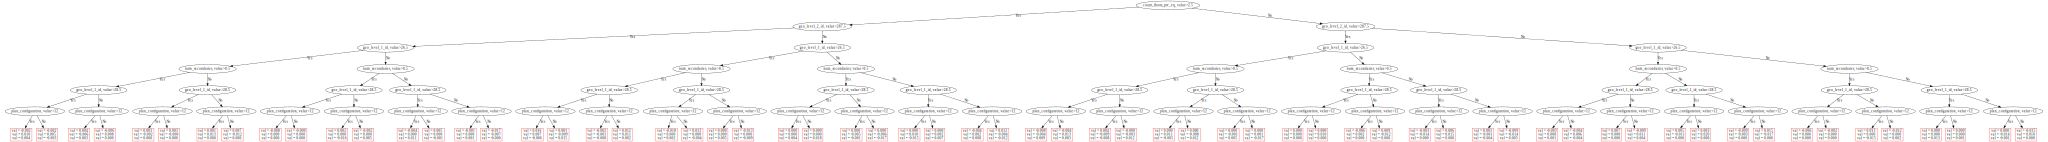

In [0]:
# visualize trees

cat_clf.plot_tree(tree_idx=123, pool=train_pool)

In [0]:
# feature importances

feature_stuff = dict(zip(cat_clf.feature_names_, cat_clf.feature_importances_))
feature_stuff

{'age': 4.8849543668503745,
 'area_percentage': 3.5518218049466332,
 'count_families': 0.9418195048127973,
 'count_floors_pre_eq': 1.9965250180833714,
 'foundation_type': 3.362200798144688,
 'geo_level_1_id': 33.08508628732943,
 'geo_level_2_id': 17.12433382887063,
 'geo_level_3_id': 8.417276071926873,
 'ground_floor_type': 1.3560413134534768,
 'height_percentage': 3.134485092409677,
 'land_surface_condition': 1.1161819673389448,
 'legal_ownership_status': 0.4016714309229877,
 'num_secondaries': 0.4090893915672527,
 'num_superstructures': 0.38889603807802714,
 'other_floor_type': 1.5187788078249957,
 'plan_configuration': 0.3992335115269519,
 'position': 1.1488333183720605,
 'roof_type': 2.574402975537081,
 'secondary': 0.5996807547902256,
 'superstructures': 5.263525422047583,
 'type': 3.5338754002170973,
 'type_superstruct_sum': 4.791286894948812}

In [0]:
feature_stuff = pd.DataFrame(zip(cat_clf.feature_names_, cat_clf.feature_importances_))

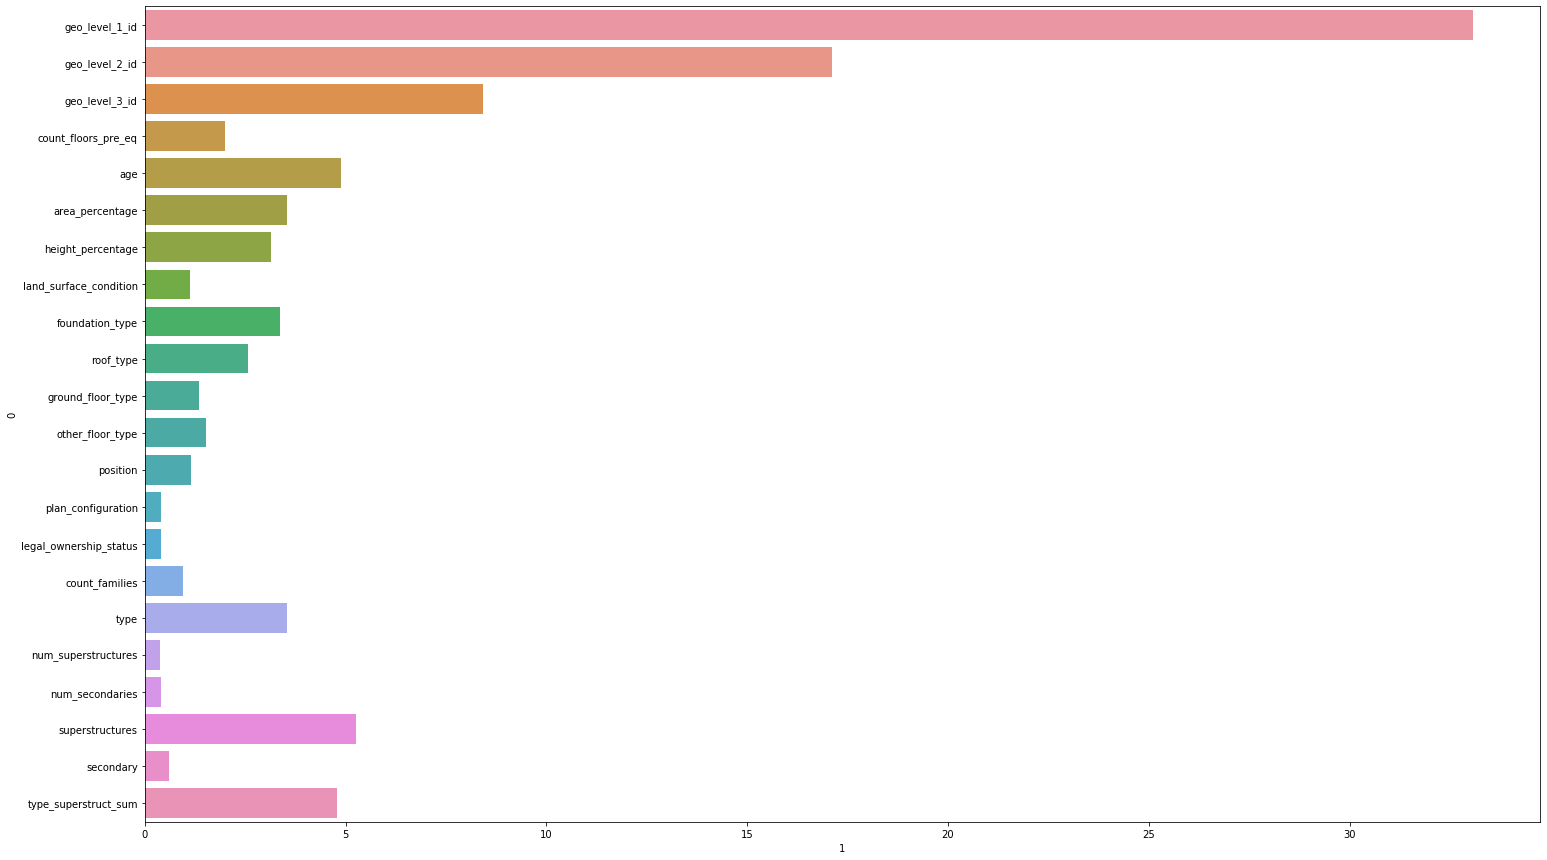

In [0]:
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x=1, y=0, data=feature_stuff, label="Total")

In [0]:
# make predictions

Y_pred_cat = cat_clf.predict(data_test).astype(int)
Y_preds_cat = []
for i in Y_pred_cat:
  Y_preds_cat.append(i[0])
del Y_pred_cat

count1=0
count2=0
count3=0

for i in Y_preds_cat:
  if i==1:
    count1+=1
  elif i==2:
    count2+=1
  elif i==3:
    count3+=1
  else:
    print("Prediction Value Unacceptable")
    
print("1's:", count1)
print("2's:", count2)
print("3's:", count3)

1's: 5710
2's: 59419
3's: 21739


Text(0.5, 1.0, 'TRAIN: # of Buildings for each Damage Grade')

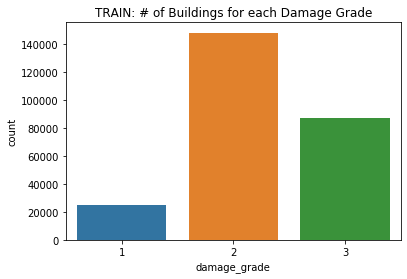

In [0]:
sns.countplot(data['damage_grade'])
plt.title('TRAIN: # of Buildings for each Damage Grade')

Text(0.5, 1.0, 'PREDICTIONS: # of Buildings for each Damage Grade')

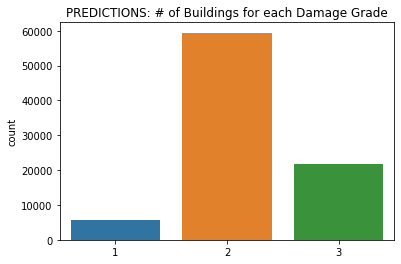

In [0]:
sns.countplot(Y_preds_cat)
plt.title('PREDICTIONS: # of Buildings for each Damage Grade')

In [0]:
submission_cat = pd.DataFrame({
    "building_id": building_ids,
    "damage_grade": Y_preds_cat
    })
del Y_preds_cat
submission_cat.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [0]:
submission_cat.to_csv('EARTHQUAKE_DAMAGE_SUBMISSION_CAT.csv', index=False)
from google.colab import files
files.download('EARTHQUAKE_DAMAGE_SUBMISSION_CAT.csv')

In [0]:
# random forest model

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=1500, random_state=42)
rnd_clf.fit(data.drop('damage_grade', axis=1), data.damage_grade)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# extract one tree

estimator = rnd_clf.estimators_[123]

In [0]:
# visualize tree

from sklearn.tree import export_graphviz
# export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names=X_train.columns,
                class_names=y_train.name,
                rounded=True, proportion=False, 
                precision=2, filled=True)
del estimator

In [0]:
# convert dot to png

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [0]:
# plot tree

from IPython.display import Image
Image(filename = 'tree.png')

In [0]:
# feature importances

for feature_name, feature_importance in zip(X_train.columns, rnd_clf.feature_importances_):
    print(feature_name, feature_importance)

geo_level_1_id 0.13793427318315066
geo_level_2_id 0.13024564751674708
geo_level_3_id 0.14683721954517642
count_floors_pre_eq 0.015552995232242857
age 0.1182956973731796
area_percentage 0.07244609026290935
height_percentage 0.04500939993992502
land_surface_condition 0.019271508662668798
foundation_type 0.021719632827658937
roof_type 0.019172645160710638
ground_floor_type 0.010908455909423163
other_floor_type 0.011072788437625061
position 0.021689770786356203
plan_configuration 0.009067052811361085
legal_ownership_status 0.007789734150949284
count_families 0.02487038073635921
width_percentage 0.07369054929481215
type 0.03148319653994198
num_superstructures 0.011861690198834504
num_secondaries 0.007084958897864503
superstructures 0.05337652938837818
secondary 0.010619783143725438


In [0]:
feature_stuff = pd.DataFrame(zip(X_train.columns, rnd_clf.feature_importances_))

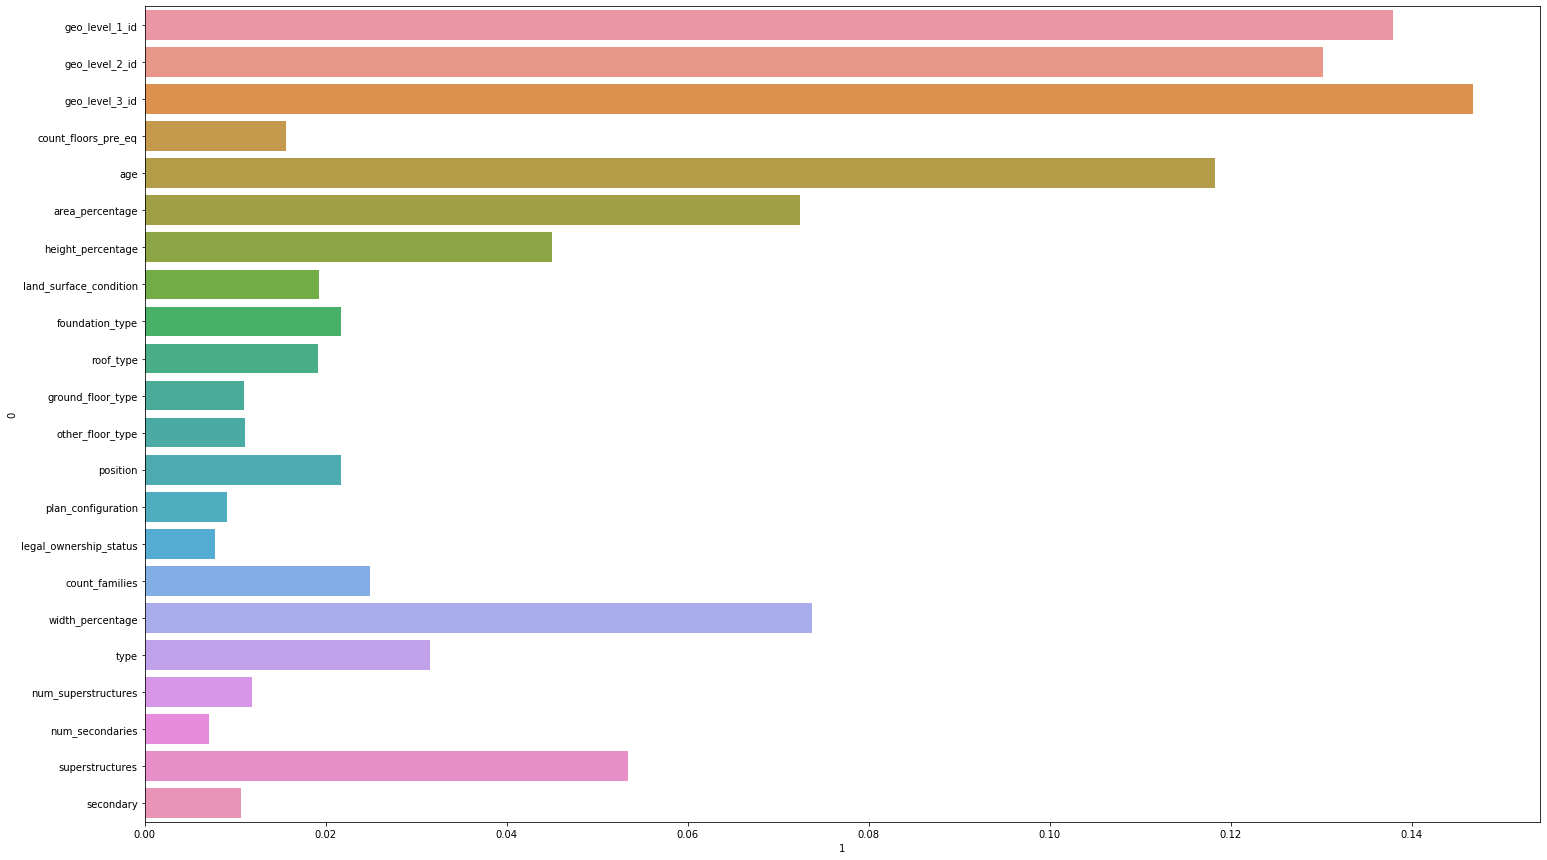

In [0]:
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x=1, y=0, data=feature_stuff, label="Total")

In [0]:
# make predictions

Y_preds_rnd = rnd_clf.predict(data_test).astype(int)

count1=0
count2=0
count3=0

for i in Y_preds_rnd:
  if i==1:
    count1+=1
  elif i==2:
    count2+=1
  elif i==3:
    count3+=1
  else:
    print("Prediction Value Unacceptable")
    
print("1's:", count1)
print("2's:", count2)
print("3's:", count3)

1's: 6128
2's: 56283
3's: 24457


Text(0.5, 1.0, 'TRAIN: # of Buildings for each Damage Grade')

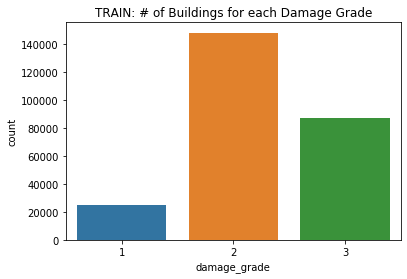

In [0]:
sns.countplot(data['damage_grade'])
plt.title('TRAIN: # of Buildings for each Damage Grade')

Text(0.5, 1.0, 'PREDICTIONS: # of Buildings for each Damage Grade')

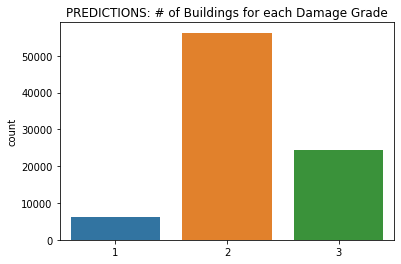

In [0]:
sns.countplot(Y_preds_rnd)
plt.title('PREDICTIONS: # of Buildings for each Damage Grade')

In [0]:
submission_rnd = pd.DataFrame({
    "building_id": building_ids,
    "damage_grade": Y_preds_rnd
    })
del Y_preds_rnd
submission_rnd.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [0]:
submission_rnd.to_csv('EARTHQUAKE_DAMAGE_SUBMISSION_RNDM_FRST.csv', index=False)
from google.colab import files
files.download('EARTHQUAKE_DAMAGE_SUBMISSION_RNDM_FRST.csv')